In [135]:
from tkinter import *
import decimal
import numpy as np
import ctypes
import pyautogui
from pytesseract import pytesseract
import pandas as pd

In [7]:
user32 = ctypes.windll.user32
screenSize = user32.GetSystemMetrics(0), user32.GetSystemMetrics(1)
centerPoint = tuple(i/2 for i in screenSize)
monitor_width = screenSize[0]
monitor_height = screenSize[1]

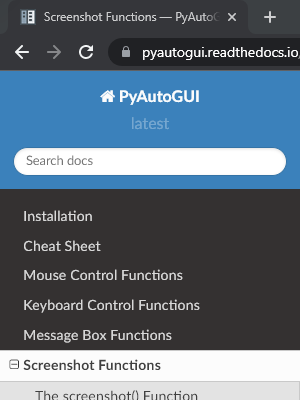

In [8]:
pyautogui.screenshot(region=(0,
                             0, 
                             300, 
                             400))

In [9]:
root = Tk()

In [112]:
def drange(x, y, jump):
    while x < y:
        yield float(x)
        x += decimal.Decimal(jump)
        
def cell_dims(x1, y1, x2, y2):
    return x1, y1, x2 - x1, y2 - y1

def cell_dims_from_list(list_onbj):
    return cell_dims(list_onbj[0], list_onbj[1], list_onbj[2], list_onbj[3])
    
    

images = []
        
canvas = Canvas(root, background="#ffffff")

scan_results_box = [1612, 1076, 2075, 1332] #x,y TopLeft ,x,y Bottom Right

# box
canvas.create_line(scan_results_box[0], scan_results_box[1],
                   scan_results_box[0], scan_results_box[3],
                   
                   scan_results_box[0], scan_results_box[3],
                   scan_results_box[2], scan_results_box[3],
                   
                   scan_results_box[2], scan_results_box[3],
                   scan_results_box[2], scan_results_box[1],
                   
                   scan_results_box[2], scan_results_box[1],
                   scan_results_box[0], scan_results_box[1],

                   fill="#ff6600", width=1)

images.append(pyautogui.screenshot(region=(0,0,monitor_width,monitor_height)))

# rows
space = (scan_results_box[3] - scan_results_box[1]) / 12
row_points= list(drange(scan_results_box[1], scan_results_box[3], f'{space}'))
final_row_points = list(np.rint(np.asarray(row_points)).astype(int))
for i in final_row_points:
    canvas.create_line(scan_results_box[0], i, scan_results_box[2], i, 
                   fill="#ff6600", width=1)
col_delta = scan_results_box[2] - scan_results_box[0]
cols_points =  [col_delta * .45, col_delta * .15, col_delta * .2]

final_col_points = np.array([scan_results_box[0] + cols_points[0],
                             scan_results_box[0] + cols_points[0] + cols_points[1],
                             scan_results_box[0] + cols_points[0] + cols_points[1] + cols_points[2],])
final_col_points = list(np.rint(final_col_points).astype(int))
# cols
for i in final_col_points:
    canvas.create_line(i, scan_results_box[1],
                       i, scan_results_box[3],
                   fill="#ff6600", width=1)

print(final_row_points)
print(final_col_points)



canvas.pack(fill=BOTH, expand=1)

[1076, 1097, 1119, 1140, 1161, 1183, 1204, 1225, 1247, 1268, 1289, 1311, 1332]
[1820, 1890, 1982]


In [113]:
final_row_points

[1076, 1097, 1119, 1140, 1161, 1183, 1204, 1225, 1247, 1268, 1289, 1311, 1332]

In [114]:
[scan_results_box[0]] + final_col_points + [scan_results_box[2]]

[1612, 1820, 1890, 1982, 2075]

In [115]:
x_range = [scan_results_box[0]] + final_col_points + [scan_results_box[2]]
y_range = final_row_points

cells = {}

for i, x in enumerate(x_range):
    for j, y in enumerate(y_range):
        try:
            cells[i, j] = tuple([x, y, x + x_range[i+1], y + y_range[j+1]])
            #cells[i, j] = tuple([y, x, y_range[j+1], x_range[i+1]])
        except:
            pass
 

In [145]:
frames = []

for i in range(12):
    frame = {}
    for j in range(0, 4):
        
        cell = cell_dims_from_list(list(cells[j, i]))
        cell_image = images[0].crop(cell)
        transcript = pytesseract.image_to_string(cell_image)
        
        frame[j] = transcript.replace('\n','').replace('+','').replace('>','')
    frames.append(frame)
pd.DataFrame(frames)

,0,1,2,3
0,@ Condensed Scordite [7],,,
1,Condensed Scardite,"25,984","3,897 m3","4,825 m"
2,Condensed Scordite,"23,266","3,489 m3",8172 m
3,Condensed Scordite,"20,878","3,130 m3",2.505 m
4,Condensed Scordite,"19,114","2,867 m3",4926m @
5,Condensed Scordite,"17,216","2,582 m3",8066m Ff
6,Condensed Scordite,"16,387","2,458 m3",5661m @
7,Condensed Scordite,"14,068","2,118 m3",978 m
8,@ Scordite [4],,,
9,Scordite,"52,206","7,838 m3",379 m


In [129]:
for k in cells.keys():
    cell = cell_dims_from_list(list(cells[k]))
    cell_image = images[0].crop(cell)
    transcript = pytesseract.image_to_string(cell_image)
    print(f"row {k[1]}      col {k[0]}            '{transcript}'")


row 0      col 0            '+ @ Condensed Scordite [7]
'
row 1      col 0            'Condensed Scardite
'
row 2      col 0            'Condensed Scordite
'
row 3      col 0            'Condensed Scordite
'
row 4      col 0            'Condensed Scordite
'
row 5      col 0            'Condensed Scordite
'
row 6      col 0            'Condensed Scordite
'
row 7      col 0            'Condensed Scordite
'
row 8      col 0            '> @ Scordite [4]
'
row 9      col 0            'Scordite
'
row 10      col 0            'Scordite
'
row 11      col 0            'Scordite
'
row 0      col 1            ''
row 1      col 1            '25,984
'
row 2      col 1            '23,266
'
row 3      col 1            '20,878
'
row 4      col 1            '19,114
'
row 5      col 1            '17,216
'
row 6      col 1            '16,387
'
row 7      col 1            '14,068
'
row 8      col 1            ''
row 9      col 1            '52,206
'
row 10      col 1            '26,686
'
row 11      col 1

In [116]:
cell = cell_dims_from_list(list(cells[0, 0]))
cell

(1612, 1076, 1820, 1097)

In [117]:
cell_image = images[0].crop(cell)
cell_image

In [118]:
pytesseract.image_to_string(cell_image)

'+ @ Condensed Scordite [7]\n'

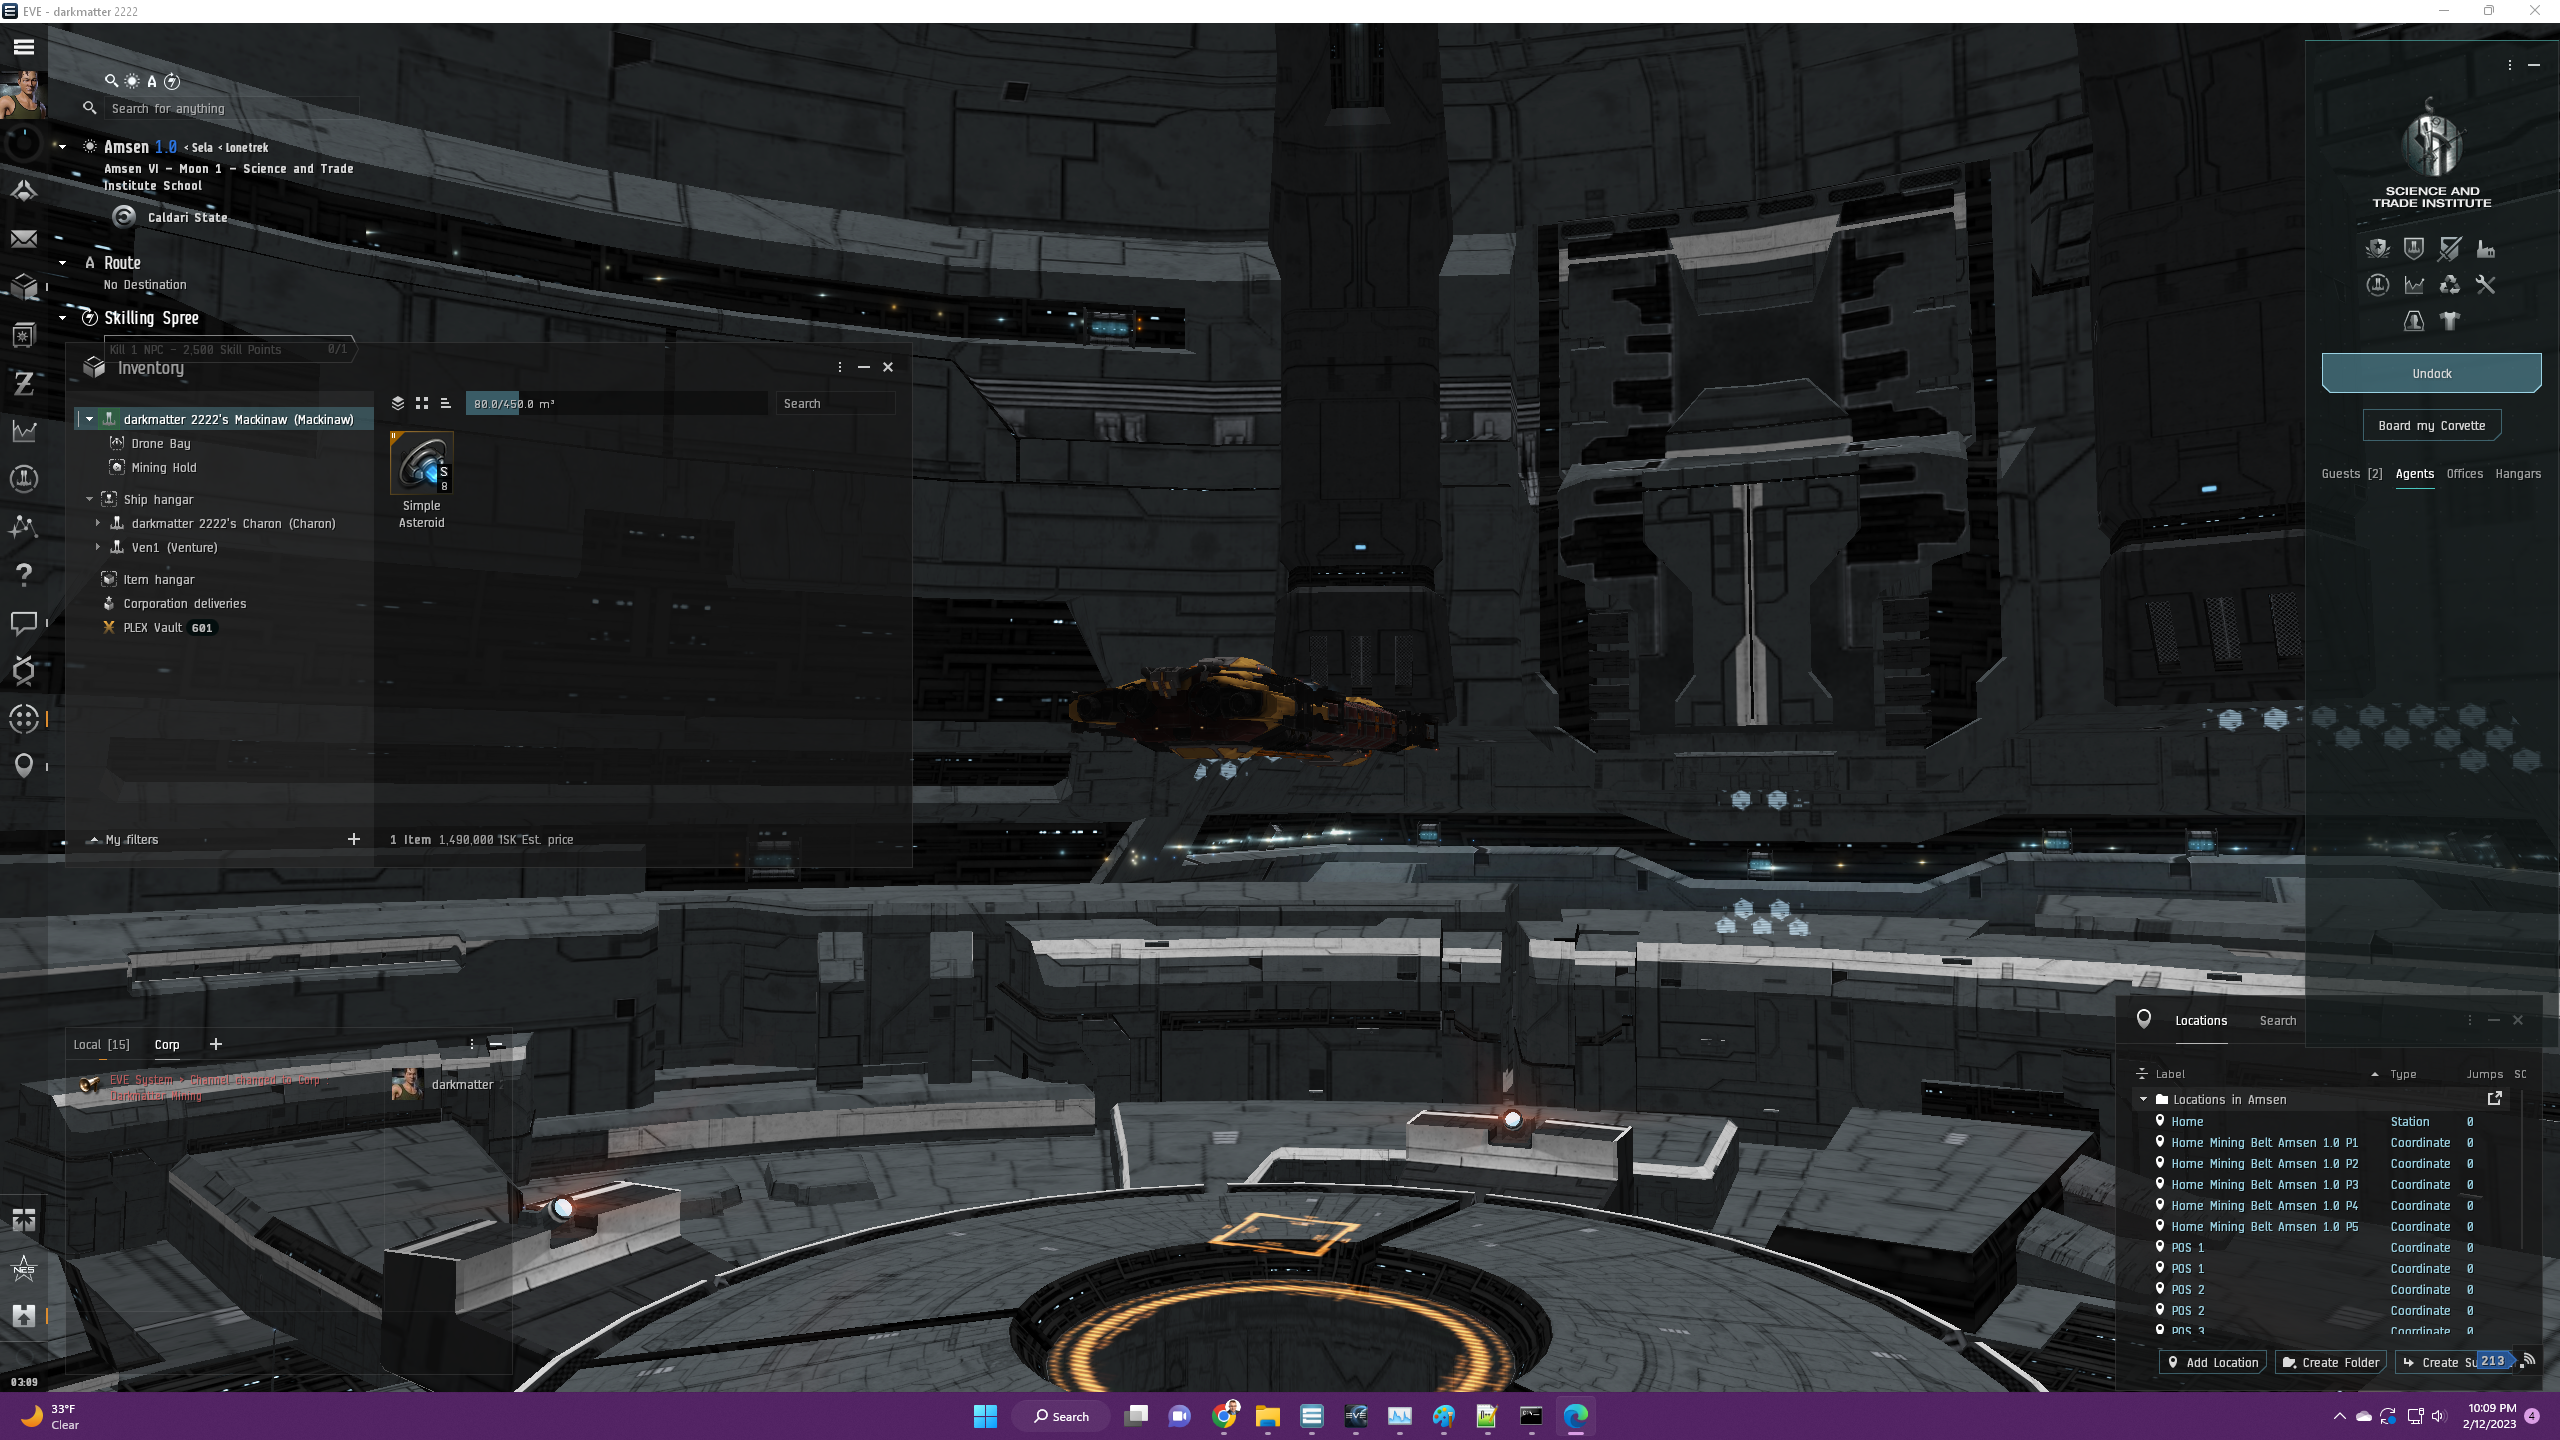

In [91]:
images[0]

In [16]:
pytesseract.image_to_string(images[0])

'y Mi Condensed Scordite [7]\n\nCondensed Scordite\n(Condensed Scordite\nCondensed Scordite\nCondensed Scordite\nCondensed Scordite\nCondensed Scordite\nCondensed Scordite\n@ Scordite [4]\nScordite\n\nScordite\n\nScordite\n\n22,244\n20,146\n19.891\n19,165\n14,931\n14,613\n\n2572\n\n37,084\n25,014\n14,568\n\n3,336\n3021\n2,983\n2874\n2,238\n2191\n\n385\n\n5,562\n3,752\n2,185\n\nm3\nma\nm3\nm3\nm3\nm3\nm3\n\nm3\nm3\nm3\n\n9,582 m\nih km\n10 km\n14 km\n13 km\n15 km\n\n3,062 m\n\n8,888 m\n4,625 m\n2,625 m\n\n'

In [ ]:
root.overrideredirect(True)
root.attributes('-topmost', True)
root.wm_attributes("-transparentcolor", "#ffffff")
root.configure(background='#ffffff')
root.geometry('%dx%d+%d+%d' % (monitor_width, monitor_height, 0, 0))
root.title("Overlay")


root.mainloop()